<a href="https://colab.research.google.com/github/ernesto-miguez/Machine-Learning-training/blob/master/Douglas_Peuker_simplification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# magic command to display matplotlib plots inline within the ipython notebook webpage
%matplotlib inline

# import necessary modules
import pandas as pd, numpy as np, matplotlib.pyplot as plt
import shapely
from shapely.geometry import LineString
from time import time

In [ ]:
# Load the point data
df = pd.read_csv('../summer-travel-gps-full.csv')
coordinates = df[['lat', 'lon']].values

In [ ]:
df.head()

,lat,lon,date,city,country
0,51.481292,-0.451011,05/14/2014 09:07,West Drayton,United Kingdom
1,51.474005,-0.450999,05/14/2014 09:22,Hounslow,United Kingdom
2,51.478199,-0.446081,05/14/2014 10:51,Hounslow,United Kingdom
3,51.478199,-0.446081,05/14/2014 11:24,Hounslow,United Kingdom
4,51.474146,-0.451562,05/14/2014 11:38,Hounslow,United Kingdom


In [ ]:
# Create a shapely line from the point data
line = LineString(coordinates)

tolerance = 0.015

simplified_line = line.simplify(tolerance, preserve_topology=False)

print(line.length, 'line length')
print(simplified_line.length, 'simplified line length')
print(len(line.coords),  'coordinate pairs in full data set')
print(len(simplified_line.coords), 'coordinate pairs in simplified data set')
print(round(((1 - float(len(simplified_line.coords)) / float(len(line.coords))) * 100), 1), 'percent compressed')

146.33453899578328 line length
143.92611626180422 simplified line length
1759 coordinate pairs in full data set
178 coordinate pairs in simplified data set
89.9 percent compressed


In [ ]:
# Save the simplified set of coordinates as a new dataframe
lat = pd.Series(pd.Series(simplified_line.coords.xy)[0])
lon = pd.Series(pd.Series(simplified_line.coords.xy)[1])
si = pd.DataFrame({'lon':lon, 'lat':lat})
si.tail()

,lon,lat
173,28.983285,41.044556
174,28.968268,41.008992
175,28.985488,41.043487
176,28.823879,40.977637
177,11.791346,48.357110


## Extract the index of the pairs of coordinates in the simplified dataset 

In [ ]:
start_time = time()

# df_label column will contain the label of the matching row from the original full data set
si['df_label'] = None

# For each coordinate pair in the simplified set
for si_label, si_row in si.iterrows():
  si_coords = (si_row['lat'], si_row['lon'])

  # For each coordinate pair in the full data set:
  for df_label, df_row in df.iterrows():

    # Compare tuples of coordinates, if the points match, save this row's label as the matching one
    if si_coords == (df_row['lat'], df_row['lon']):
      si.loc[si_label, 'df_label'] = df_label
      break

print('process took %s seconds' % round(time()-start_time,2))

process took 15.85 seconds


In [ ]:
si.head()

,lon,lat,df_label
0,-0.451011,51.481292,0
1,-9.137544,38.781775,7
2,-9.139739,38.711050,13
3,-9.120558,38.715637,18
4,-9.141788,38.711977,22


## Select the rows from the original full dataset whose labels appear in the df_label column in th simplified dataset

In [ ]:
rs = df.loc[si['df_label'].dropna().values]

rs.head()

,lat,lon,date,city,country
0,51.481292,-0.451011,05/14/2014 09:07,West Drayton,United Kingdom
7,38.781775,-9.137544,05/14/2014 15:11,Lisbon,Portugal
13,38.711050,-9.139739,05/14/2014 16:40,Lisbon,Portugal
18,38.715637,-9.120558,05/14/2014 18:25,Lisbon,Portugal
22,38.711977,-9.141788,05/14/2014 19:26,Lisbon,Portugal


## Plot the final simplified set of coordinate points vs the original full set

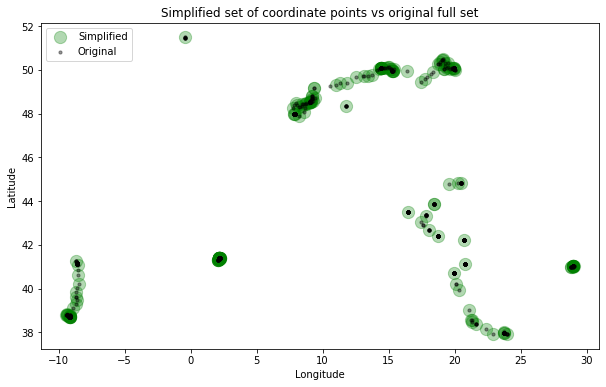

In [ ]:
plt.figure(figsize=(10,6))
rs_scatter = plt.scatter(rs['lon'], rs['lat'], c='g', alpha=0.3, s=150)
df_scatter = plt.scatter(df['lon'], df['lat'], c='k', alpha=0.4, s=10)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Simplified set of coordinate points vs original full set')
plt.legend((rs_scatter, df_scatter), ('Simplified', 'Original'), loc='upper left')